# Importing libraries

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
os.chdir("f:\\Bike_rent_project")

In [55]:
os.getcwd()

'f:\\Bike_rent_project'

In [56]:
os.listdir()

['.RData',
 '.Rhistory',
 'bike-rent-project (1).ipynb',
 'Bike_Renting_Python.csv',
 'Bike_rent_project_final.R',
 'day.csv',
 'Final Files',
 'Random forest output python.csv']

In [57]:
# Read the csv file into pandas data frame to make it more readable.
bike_day = pd.read_csv("day.csv")

#  Exploratory Data Analysis

In [58]:
# Check few rows and alumns of the data frame bike_new
bike_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [59]:
# check the shape of the data
bike_day.shape

(731, 16)

In [60]:
# Look at all the variables and their information in a gist.
bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [61]:
# check all column names
bike_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [62]:
# check the target or dependent variable
bike_day["cnt"].describe()
#type(bike_day["cnt"]),  variable : cnt is float

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [63]:
# check data types for all the variable
bike_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [64]:
bike_day["weathersit"].unique()

array([2, 1, 3], dtype=int64)

In [65]:
# changing data types of variables to ease in understanding and calculation.
bike_day["season"] = bike_day["season"].astype("category")
bike_day["yr"] = bike_day["yr"].astype("category")
bike_day["mnth"] = bike_day["mnth"].astype("category")
bike_day["holiday"] = bike_day["holiday"].astype("category")
bike_day["weekday"] = bike_day["weekday"].astype("category")
bike_day["workingday"] = bike_day["workingday"].astype("category")
bike_day["weathersit"] = bike_day["weathersit"].astype("category")
bike_day['dteday'] = pd.to_datetime(bike_day['dteday'],yearfirst=True)

In [66]:
bike_day.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [67]:
bike_day['season'].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [68]:
bike_day.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

# Missing value analysis

In [69]:
# Create a variable and assign missing values in "bike_day" by calculating all the values in each variable
missing_value = pd.DataFrame(bike_day.isnull().sum())

In [70]:
# check missing values
missing_value # no missing value present in the data.

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


# Detecting and Removing Outliers

In [71]:
df = bike_day.copy()
#bike_day = df.copy()

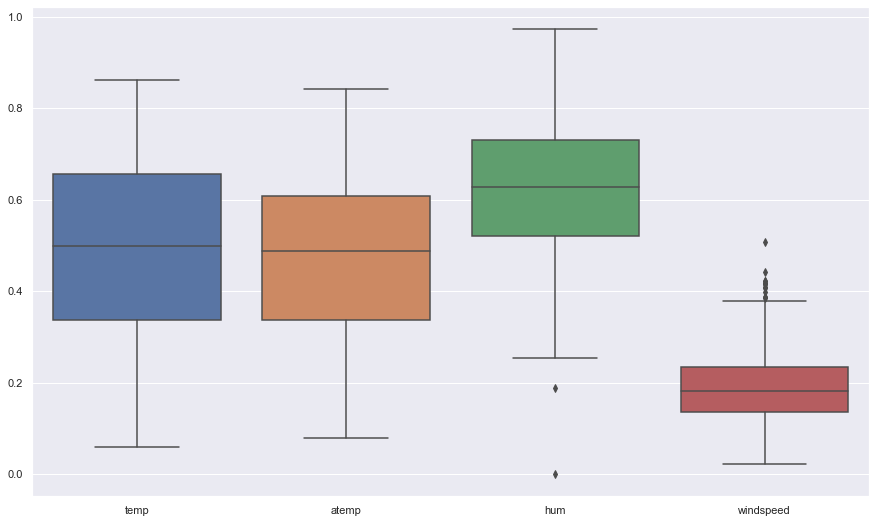

In [72]:

# Outliers detection in continuos variables = temp, atemp, hum, windspeed.
fig, ax = plt.subplots(figsize = (15,9))
sns.set()
sns.boxplot(data = bike_day[["temp", "atemp", "hum", "windspeed"]])
plt.show()

It can be observed that outiers are only present in "hum" and "windspeed" variable.

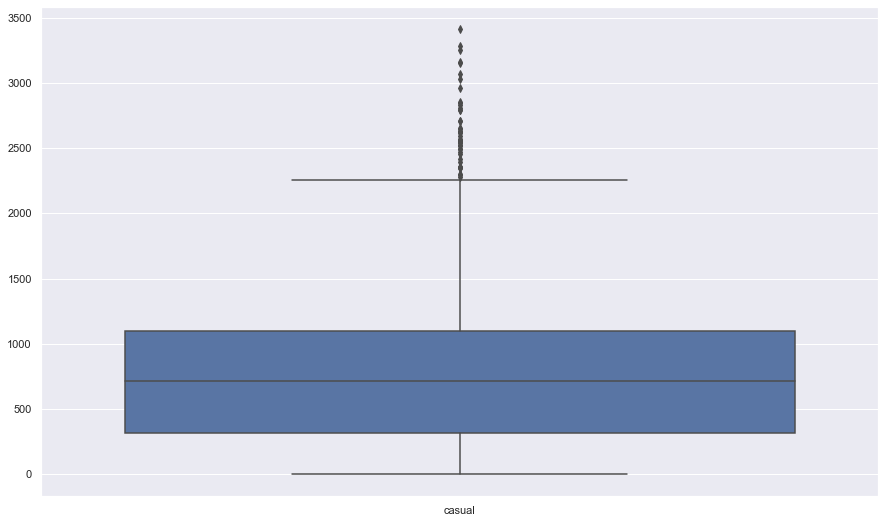

In [73]:
#  Outliers detection in continuos variables = casual ,registered 
fig, ax = plt.subplots(figsize = (15,9))
sns.set()
sns.boxplot(data = bike_day[["casual"]])
plt.show()

It can be observed that the number of outliers in variable "casual" is higher.

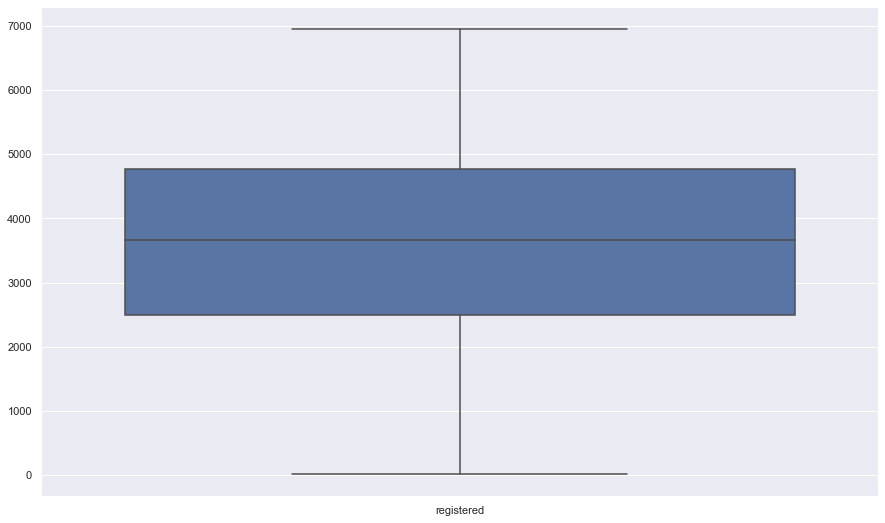

In [74]:
#  Outliers detection in continuos variables = casual ,registered 
fig, ax = plt.subplots(figsize = (15,9))
sns.set()
sns.boxplot(data = bike_day[["registered"]])
plt.show()

There are no outliers present in variable = "registered".

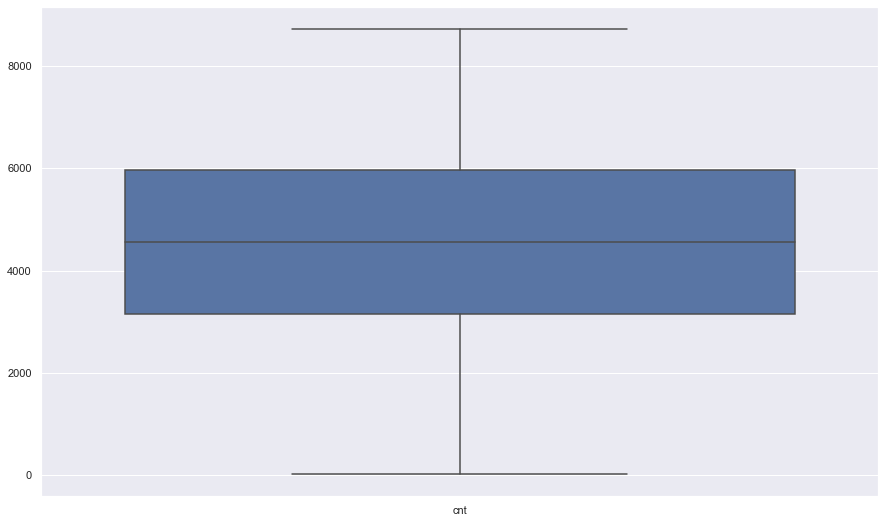

In [75]:
#  Outliers detection in continuos target variables = cnt
fig, ax = plt.subplots(figsize = (15,9))
sns.set()
sns.boxplot(data = bike_day[["cnt"]])
plt.show()

In [76]:
# Save all the numeric or continuous variables for further outlier analsysi and computation.
cnames = ["hum", "windspeed","casual"]
num_var = ["temp", "atemp","hum", "windspeed","casual", "registered", "cnt"]

In [77]:
cnames

['hum', 'windspeed', 'casual']

In [78]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(bike_day.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr = q75 - q25 #Inter quantile range
    min = q25 - (iqr * 1.5) #inner fence
    max = q75 + (iqr * 1.5) #outer fence
    print(min)
    print(max)
    bike_day = bike_day.drop(bike_day[bike_day.loc[:,i] < min].index)  #Replace with NA
    bike_day = bike_day.drop(bike_day[bike_day.loc[:,i] > max].index) #Replace with NA

hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585
casual
-885.0
2323.0


In [79]:
bike_day.shape

(676, 16)

# Feature Selection

In [80]:
df_corr = bike_day.loc[:,num_var]

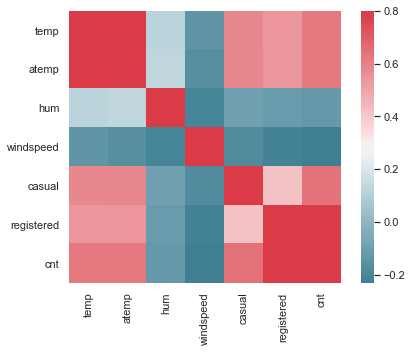

In [81]:
f, ax = plt.subplots(figsize =(7,5))
corr = df_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax = 0.8,
            square=True, ax=ax)

This clearly shows that temp and atemp are highly correlated with each other so we will ignore atemp variable.
Also,
cnt,casual and registered are highly correlated , so we will ignore casual and registered variable.

In [82]:
char_var = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

In [83]:
# Chi-square Test
from scipy.stats import chi2_contingency
for i in char_var:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(bike_day["cnt"],bike_day[i]))
    print(p)

season
0.5306886312713439
yr
0.41642366315035007
mnth
0.4756091821561145
holiday
0.7870836122582522
weekday
0.43936502670720573
workingday
0.504633411642988
weathersit
0.5464467453059881


In [84]:
bike_day = bike_day.drop(["atemp", "casual", "registered"], axis = 1)

In [85]:
bike_day.shape

(676, 13)

In [86]:
num_val = ["temp" , "hum", "windspeed", "cnt"]

(array([ 2., 16., 29., 33., 64., 78., 83., 79., 58., 68., 50., 27., 25.,
        23., 11., 19., 11.]),
 array([0.0223917 , 0.04331619, 0.06424068, 0.08516516, 0.10608965,
        0.12701414, 0.14793863, 0.16886312, 0.18978761, 0.21071209,
        0.23163658, 0.25256107, 0.27348556, 0.29441005, 0.31533454,
        0.33625902, 0.35718351, 0.378108  ]),
 <a list of 17 Patch objects>)

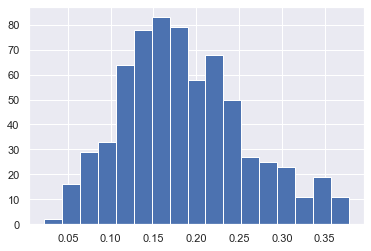

In [87]:
#normality check
%matplotlib inline
plt.hist(bike_day["windspeed"], bins = "auto")

In [88]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [89]:
# Spilt the data into train and test data
train, test = train_test_split(bike_day, test_size=0.2)

# Decision Tree Regression Model

In [90]:
from sklearn.tree import DecisionTreeRegressor #import required library
train_features_one = train[['season','yr','hum','mnth','holiday','weekday','weathersit','temp','windspeed']].values
train_target_feature = train['cnt'].values
test_feature = test[['season','yr','mnth','hum','holiday','weekday','weathersit','temp','windspeed']].values
test_target_feature= test['cnt'].values
my_tree_one = DecisionTreeRegressor()
my_tree_one = my_tree_one.fit(train_features_one, train_target_feature)
print(my_tree_one)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [91]:
prediction_dt = my_tree_one.predict(test_feature)
print(prediction_dt)

[ 801. 3372. 2432. 2594. 4352. 3372. 3372. 4669.  627. 2177. 3372. 4352.
 3214. 2432. 5170.  985. 1115. 3372. 3544. 3372. 4352.  985. 3409.  431.
 3372. 3510. 3409. 3510. 4669. 5582. 4352. 5170. 3544. 2177. 3544. 5170.
 2432. 5170. 1607. 4352. 3372. 3544.  627. 4669. 3372. 3959. 2177. 1115.
 5478. 1115. 3372. 3372.  431. 3409. 2177. 5478. 3372. 5170. 3214.  683.
 4352. 1607.  431. 3372.  431. 3372. 3372. 5478. 5582. 3372.  627.  627.
 5478. 3372.  801. 5478. 1115. 2416.  801. 4352. 5478. 3372. 3372. 1607.
 3544. 4352.  985. 3372. 3456. 3544. 4352. 3456. 5170. 3372. 3372. 5478.
  683. 2425. 1115. 2177. 4352. 3372. 1115. 4352. 3409. 1115. 3372. 4352.
 3409.  683. 5170. 1115. 1607.  985. 2177. 3544. 4352. 5170. 3372.  801.
 1013. 3544. 4352. 3372. 3409. 1607. 2177. 4352. 4352. 1115. 5170. 1607.
 3544. 3372. 3372. 5170.]


In [92]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test_target_feature, prediction_dt)

42.4512583015136

In [93]:
# Define RMSE function
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse

In [94]:
#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two

my_tree_two = DecisionTreeRegressor(max_depth = 8 , min_samples_split = 4, random_state = 1)
my_tree_two = my_tree_two.fit(train_features_one, train_target_feature)
print(my_tree_two)

prediction_dt_two = my_tree_two.predict(test_feature)

print(prediction_dt_two)

MAPE(test_target_feature,prediction_dt_two)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')
[ 893.         4390.33333333 2204.5        2392.         4236.
 4390.33333333 4390.33333333 4664.71428571 4114.6        2101.66666667
 3372.         4236.         3755.66666667 2204.5        5083.
  893.         1985.         4390.33333333 3476.5        3372.
 4236.          893.         3476.5         540.         4390.33333333
 4664.71428571 3476.5        4664.71428571 4664.71428571 5908.5
 4236.         5083.         3476.5        2101.66666667 3476.5
 5083.         2204.5        5083.         3583.90909091 4236.
 4390.33333333 3476.5        3583.90909091 4664.71428571 4390.33333333
 3755.666666

35.10173912323955

In [95]:
RMSE(test_target_feature,prediction_dt_two)

Mean Square :  3202476.9491202603
Root Mean Square :  1789.5465764042747


1789.5465764042747

# Random forest regression model

In [96]:
# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor

RF_model_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_features_one,train_target_feature)
#rf_exp.fit(train_features, train_labels)

print(RF_model_one)
# Predict the model using predict funtion

RF_predict_one= RF_model_one.predict(test_feature)

print(RF_predict_one)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)
[1055.88  4938.328 2245.97  2602.336 3306.434 5440.102 5294.722 4742.222
 1797.728 2890.772 4127.132 3440.024 3527.92  2326.242 5137.62  1108.444
 3115.09  5300.97  3276.226 5206.074 3446.288 1203.326 3564.148  681.982
 5522.122 4907.378 3389.078 4635.276 4292.958 4378.096 3377.37  4906.466
 3378.882 2360.592 3267.288 5131.056 2281.738 4168.818 2060.382 3342.774
 4565.386 3374.194 1795.572 4405.788 4628.53  3998.958 3109.498 3198.692
 4393.684 3109.804 5140.686 4962.776  701.134 3315.486 2916.73  43

In [107]:
MAPE(test_target_feature,RF_predict_one)


31.967204886146106

In [108]:
RMSE(test_target_feature,RF_predict_one)

Mean Square :  2176164.9139435003
Root Mean Square :  1475.1830103222787


1475.1830103222787

# Linear Regression Model

In [98]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
lr_model.fit(train_features_one, train_target_feature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
lr_predict = lr_model.predict(test_feature)
print(lr_predict)

[  1124.42853545   -834.67019862   2928.5785218    -681.7205131
  -1698.81830018  -3348.86823281  -1281.94642972  -5938.17726486
  -8356.68922145   3370.76410105   -941.13040583   -971.97381142
   -363.07410181   2146.09532439  -1193.34463971 -10714.56565611
   -650.18063126   -999.84433753  -1095.68588659   2856.131803
  -4537.05636436   -762.33707146  -2905.19154431    474.53074223
   -923.52143483  -6968.01805397  -1053.33691658  -5598.7485229
  -5673.32251053  -7510.89754382   -724.090367    -2003.68662754
   -898.32400319   1754.87330996  -5774.01316682    121.9665211
   2526.47208447    996.072447    -7445.73745181  -5951.9187079
  -1808.44795943  -5088.91319938  -7509.89509479  -6332.3668565
  -1207.29115083  -7125.75380744   2553.23981971  -1581.56123491
  -7619.30906178  -1429.26467094    398.06814353  -4461.28070786
    970.59027792  -3790.24072282   3062.8133369   -5852.42615554
  -2783.99661164   2132.84073778  -6359.53178559    948.96766407
  -3529.71807172  -7582.68641388

In [105]:
MAPE(test_target_feature, lr_predict)


172.84555112776013

In [106]:
RMSE(test_target_feature, lr_predict)

Mean Square :  61422179.042146705
Root Mean Square :  7837.2303170282485


7837.2303170282485

In [102]:
result=pd.DataFrame(test_feature)
result['cnt'] = (RF_predict_one)

result.to_csv("Random forest output python.csv",index=False)

In [103]:
# Chossing Random Forest model as it has the lowest MAPE as well as RMS value
Bike_df1 = pd.DataFrame(test_feature)
Bike_df2 = pd.DataFrame(RF_predict_one)
Bike_predictions=pd.merge(Bike_df1,Bike_df2,left_index=True,right_index=True)

In [104]:
Bike_predictions
Bike_predictions.to_csv('Bike_Renting_Python.csv')